# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html_doc = requests.get(url)
soup = BeautifulSoup(html_doc.text, 'html.parser')

In [12]:
# Extract all rows of data
# Find the table
table = soup.find('table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [14]:
# Extract the header row
header_row = table.find('tr')
headers = [th.get_text(strip=True) for th in header_row.find_all('th')]

# Create an empty list
data_rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # skip header row
    cols = row.find_all('td')
    row_data = [col.get_text(strip=True) for col in cols]
    if row_data:  # skip empty rows
        data_rows.append(row_data)


In [15]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_rows, columns=headers)

In [17]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [18]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [19]:
# Change data types for data analysis
df['id'] = pd.to_numeric(df['id'], errors='coerce')  # Convert to numeric
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')  # Convert to datetime
df['sol'] = pd.to_numeric(df['sol'], errors='coerce')  # Convert to integer
df['ls'] = pd.to_numeric(df['ls'], errors='coerce')  # Convert to integer
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')  # Convert to float
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')  # Convert to float

In [20]:
# Confirm type changes were successful by examining data types again
print(df.head())
print(df.dtypes)

   id terrestrial_date  sol   ls month  min_temp  pressure
0   2       2012-08-16   10  155     6     -75.0     739.0
1  13       2012-08-17   11  156     6     -76.0     740.0
2  24       2012-08-18   12  156     6     -76.0     741.0
3  35       2012-08-19   13  157     6     -74.0     732.0
4  46       2012-08-20   14  157     6     -74.0     740.0
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [21]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"Number of months on Mars: {num_months}")

Number of months on Mars: 12


In [22]:
# 2. How many sols (Martian days) worth of data are there?
num_martian_days = df['sol'].nunique()
print(f"Number of Martian days in the dataset: {num_martian_days}")

Number of Martian days in the dataset: 1867


In [23]:
# 3. What is the average minimum temperature by month?
# Group by the 'month' column and calculate the average of 'min_temp'
monthly_avg_temp = df.groupby('month')['min_temp'].mean()

# Display the result
print("Average Minimum Temperature by Month:")
print(monthly_avg_temp)

Average Minimum Temperature by Month:
month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


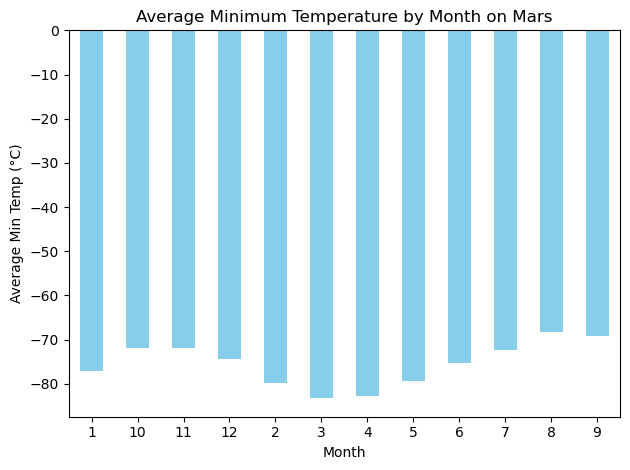

In [24]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt

# Group by the 'month' column and calculate the average of 'min_temp'
monthly_avg_temp = df.groupby('month')['min_temp'].mean()

# Plot the average minimum temperature by month
monthly_avg_temp.plot(kind='bar', color='skyblue', title="Average Minimum Temperature by Month on Mars")

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Min Temp (°C)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()  # Adjust layout to avoid clipping

# Show the plot
plt.show()

Coldest month: 3, Average Min Temp: -83.30729166666667
Hottest month: 8, Average Min Temp: -68.38297872340425


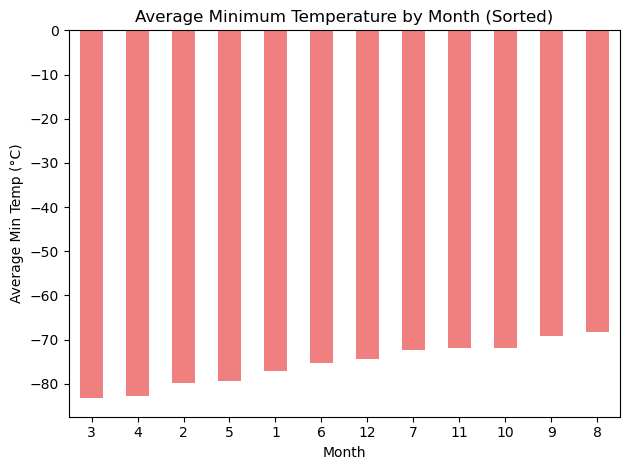

In [25]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Group by the 'month' column and calculate the average of 'min_temp'
monthly_avg_temp = df.groupby('month')['min_temp'].mean()

# Sort the temperatures to identify the coldest and hottest months
sorted_monthly_avg_temp = monthly_avg_temp.sort_values()

# Find the coldest and hottest months
coldest_month = sorted_monthly_avg_temp.idxmin()
hottest_month = sorted_monthly_avg_temp.idxmax()

print(f"Coldest month: {coldest_month}, Average Min Temp: {sorted_monthly_avg_temp[coldest_month]}")
print(f"Hottest month: {hottest_month}, Average Min Temp: {sorted_monthly_avg_temp[hottest_month]}")

# Plot the sorted average minimum temperature by month
sorted_monthly_avg_temp.plot(kind='bar', color='lightcoral', title="Average Minimum Temperature by Month (Sorted)")

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Min Temp (°C)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()  # Adjust layout to avoid clipping

# Show the plot
plt.show()

In [26]:
# 4. What is the average pressure by month?
# Group by the 'month' column and calculate the average of 'pressure'
monthly_avg_pressure = df.groupby('month')['pressure'].mean()

# Display the result
print("Average Atmospheric Pressure by Month:")
print(monthly_avg_pressure)

Average Atmospheric Pressure by Month:
month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


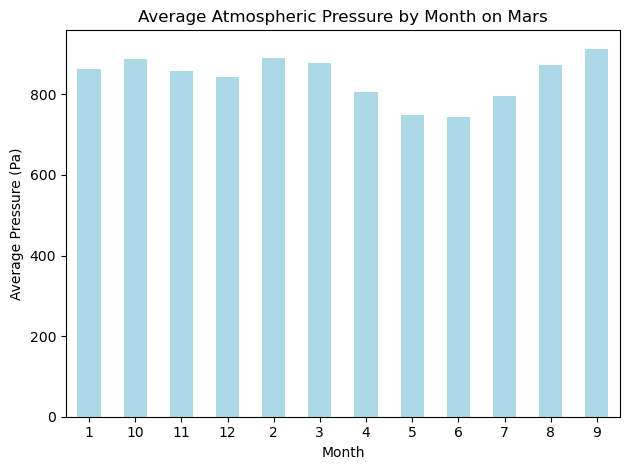

In [27]:
# Plot the average pressure by month
# Group by the 'month' column and calculate the average of 'pressure'
monthly_avg_pressure = df.groupby('month')['pressure'].mean()

# Plot the average atmospheric pressure by month
monthly_avg_pressure.plot(kind='bar', color='lightblue', title="Average Atmospheric Pressure by Month on Mars")

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()  # Adjust layout to avoid clipping

# Show the plot
plt.show()

Month with lowest atmospheric pressure: 6, Average Pressure: 745.0544217687075
Month with highest atmospheric pressure: 9, Average Pressure: 913.3059701492538


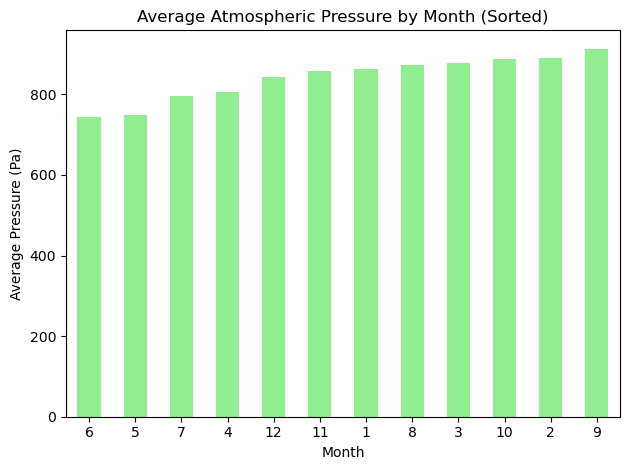

In [28]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Group by the 'month' column and calculate the average of 'pressure'
monthly_avg_pressure = df.groupby('month')['pressure'].mean()

# Sort the pressures to identify the lowest and highest pressure months
sorted_monthly_avg_pressure = monthly_avg_pressure.sort_values()

# Find the months with the lowest and highest atmospheric pressure
lowest_pressure_month = sorted_monthly_avg_pressure.idxmin()
highest_pressure_month = sorted_monthly_avg_pressure.idxmax()

print(f"Month with lowest atmospheric pressure: {lowest_pressure_month}, Average Pressure: {sorted_monthly_avg_pressure[lowest_pressure_month]}")
print(f"Month with highest atmospheric pressure: {highest_pressure_month}, Average Pressure: {sorted_monthly_avg_pressure[highest_pressure_month]}")

# Plot the sorted average atmospheric pressure by month
sorted_monthly_avg_pressure.plot(kind='bar', color='lightgreen', title="Average Atmospheric Pressure by Month (Sorted)")

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()  # Adjust layout to avoid clipping

# Show the plot
plt.show()

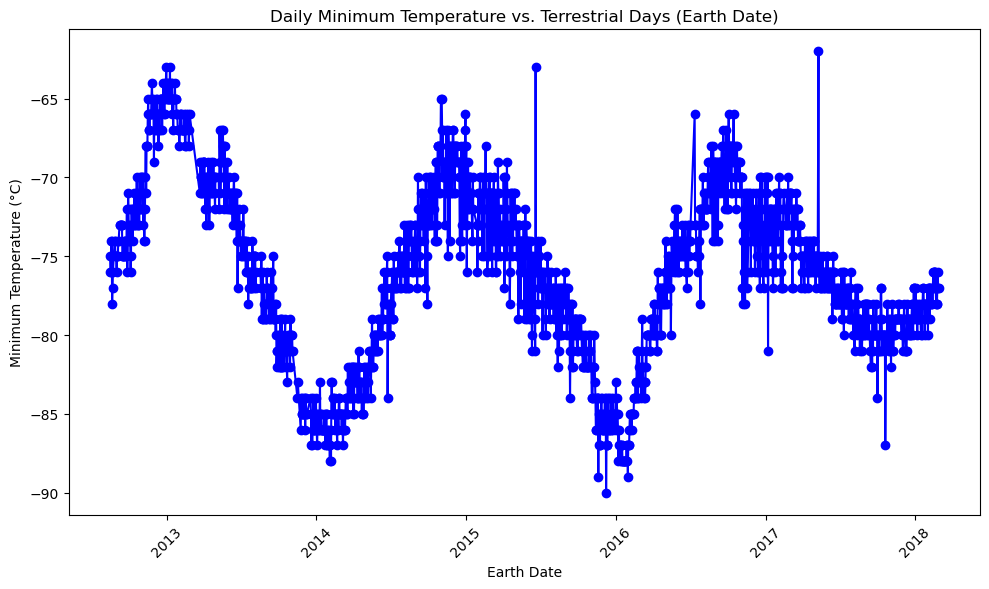

In [29]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Ensure that 'terrestrial_date' is in datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')

# Plot the daily minimum temperature against the Earth date
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title("Daily Minimum Temperature vs. Terrestrial Days (Earth Date)")
plt.xlabel("Earth Date")
plt.ylabel("Minimum Temperature (°C)")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

#### Minimum Temperature

Coldest month: 3, Average Min Temp: -83.30729166666667
Hottest month: 8, Average Min Temp: -68.38297872340425

#### Atmospheric Pressure

Month with lowest atmospheric pressure: 6, Average Pressure: 745.0544217687075
Month with highest atmospheric pressure: 9, Average Pressure: 913.3059701492538

#### Year Length

A Martian year is the time it takes for Mars to orbit the Sun once. This period is approximately 687 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [30]:
# Write the data to a CSV
# Specify the file path where you want to save the CSV
file_path = "mars_data.csv"

# Write the dataframe to a CSV file
df.to_csv(file_path, index=False)

print(f"Data has been saved to {file_path}")

Data has been saved to mars_data.csv


In [22]:
browser.quit()